In [1]:
#extract the data with this code
#    tar -xvzf C:\PATH\TO\FILE\FILE-NAME.tar.gz -C C:\PATH\TO\FOLDER\EXTRACTION
import os
import shutil
import glob
from astropy.io import fits
import numpy as np

In [2]:
os.chdir('D:/DeepLensModel/fe3ba382ae544190b60f48a6c6acd872') #extract location + filename

In [3]:
#make directory for backgrounds
if os.path.isdir('Backgrounds') is False:
    os.makedirs('Backgrounds')
    os.makedirs('Backgrounds/ibands')
    os.makedirs('Backgrounds/rbands')
    os.makedirs('Backgrounds/gbands')

In [5]:
#move individual fits files to directory
for c in glob.glob('D*'):
    for a in glob.glob(c+ '/D*'):
        for i in glob.glob(a + '/D*'):
            shutil.move(i, 'Backgrounds')

In [6]:
#organize fits files by band
for c in glob.glob('Backgrounds/*g.fits'):
    shutil.move(c, 'Backgrounds/gbands')

In [7]:
for c in glob.glob('Backgrounds/*r.fits'):
    shutil.move(c, 'Backgrounds/rbands')

In [8]:
for c in glob.glob('Backgrounds/*i.fits'):
    shutil.move(c, 'Backgrounds/ibands')

In [9]:
#get 1 fits file from each band to read in first
filename1 = os.listdir(path='Backgrounds/rbands')[0]
filename_ = 'Backgrounds/rbands/' + filename1
shutil.move(filename_, 'Backgrounds')
filename1 = 'Backgrounds/' + filename1

filename2 = os.listdir(path='Backgrounds/gbands')[0]
filename_ = 'Backgrounds/gbands/' + filename2
shutil.move(filename_, 'Backgrounds')
filename2 = 'Backgrounds/' + filename2

filename3 = os.listdir(path='Backgrounds/ibands')[0]
filename_ = 'Backgrounds/ibands/' + filename3
shutil.move(filename_, 'Backgrounds')
filename3 = 'Backgrounds/' + filename3

In [10]:
#create list of fits files in one band
filenames = os.listdir(path='Backgrounds/rbands')
a = []
for i in filenames:
    name = "Backgrounds/rbands/" + i
    a.append(name)
hdul = fits.open(filename1)
arr = hdul[0].data
arr = np.expand_dims(arr, axis=0)
x = np.size(arr[0,0,0:])
y = np.size(arr[0,0:,0])
print(x, y)

228 228


In [11]:
for i in a:
    hdul = fits.open(i)
    arr1 = hdul[0].data
    arr1 = np.expand_dims(arr1, axis=0)
    if np.size(arr1[0,0,0:]) == x and np.size(arr1[0,0:,0]) == y: # get rid of any bad cutouts
        arr = np.concatenate((arr, arr1), axis=0)
    
print(np.shape(arr))

(2232, 228, 228)


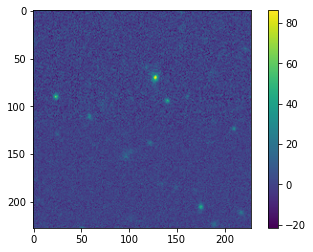

In [12]:
#double checking image
%matplotlib inline
import matplotlib.pyplot as plt
image = arr[0]
im = plt.imshow(image)
plt.colorbar(im, cmap='viridis')

In [13]:
#save all data for one band in a large fits file
hdu = fits.PrimaryHDU(data=arr)
hdu.writeto('C:/Users/paxso/BackgroundData/r.fits') #give final output directory location

In [14]:
#redo last 4 steps for other two bands
filenames = os.listdir(path='Backgrounds/gbands')
a = []
for i in filenames:
    name = "Backgrounds/gbands/" + i
    a.append(name)
hdul = fits.open(filename2)
arr = hdul[0].data
arr = np.expand_dims(arr, axis=0)
x = np.size(arr[0,0,0:])
y = np.size(arr[0,0:,0])
print(x, y)

for i in a:
    hdul = fits.open(i)
    arr1 = hdul[0].data
    arr1 = np.expand_dims(arr1, axis=0)
    if np.size(arr1[0,0,0:]) == x and np.size(arr1[0,0:,0]) == y: # get rid of any bad cutouts
        arr = np.concatenate((arr, arr1), axis=0)
    
print(np.shape(arr))

hdu = fits.PrimaryHDU(data=arr)
hdu.writeto('C:/Users/paxso/BackgroundData/g.fits')

228 228
(2232, 228, 228)


In [15]:
filenames = os.listdir(path='Backgrounds/ibands')
a = []
for i in filenames:
    name = "Backgrounds/ibands/" + i
    a.append(name)
hdul = fits.open(filename3)
arr = hdul[0].data
arr = np.expand_dims(arr, axis=0)
x = np.size(arr[0,0,0:])
y = np.size(arr[0,0:,0])
print(x, y)

for i in a:
    hdul = fits.open(i)
    arr1 = hdul[0].data
    arr1 = np.expand_dims(arr1, axis=0)
    if np.size(arr1[0,0,0:]) == x and np.size(arr1[0,0:,0]) == y: # get rid of any bad cutouts
        arr = np.concatenate((arr, arr1), axis=0)
    
print(np.shape(arr))

hdu = fits.PrimaryHDU(data=arr)
hdu.writeto('C:/Users/paxso/BackgroundData/i.fits')

228 228
(2232, 228, 228)
